In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

# Load dataset:

In [2]:
df=pd.read_csv("supermarket.csv")
df

,Unnamed: 0,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Rating
0,0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,9.1
1,1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,9.6
2,2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,7.4
3,3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,8.4
4,4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,6.2
996,996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,4.4
997,997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,7.7
998,998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,4.1


# Drop usless columns:

In [3]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

# Check columns datatype and null values:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Invoice ID     1000 non-null   object 
 1   Branch         1000 non-null   object 
 2   City           1000 non-null   object 
 3   Customer type  1000 non-null   object 
 4   Gender         1000 non-null   object 
 5   Product line   1000 non-null   object 
 6   Unit price     1000 non-null   float64
 7   Quantity       1000 non-null   int64  
 8   Tax 5%         1000 non-null   float64
 9   Total          1000 non-null   float64
 10  Date           1000 non-null   object 
 11  Time           1000 non-null   object 
 12  Payment        1000 non-null   object 
 13  Rating         1000 non-null   float64
dtypes: float64(4), int64(1), object(9)
memory usage: 109.5+ KB


# Feature Engineering:

#### I will make date and time columns one column to convert them to datetime to make feature engineering on new column.

In [5]:
def merge_columns(x):
    return x['Date']+" "+x['Time']
df['DateTime']=df.apply(merge_columns,axis=1)

In [6]:
df.drop(['Date','Time'],inplace=True,axis=1)

In [7]:
df['DateTime']=pd.to_datetime(df['DateTime'],format='%m/%d/%Y %H:%M')

In [8]:
df['day_name']=df['DateTime'].dt.day_name()

In [9]:
df['Hour']=df['DateTime'].dt.hour

In [10]:
def time(clk):
    if clk in range(0,12):
        return 'Morning'
    elif clk in range(12,18):
        return 'Afternoon'
    elif clk in range(18,22):
        return 'Evenning'
    elif clk in range(22,24):
        return 'Night'
df['day_period']=df['Hour'].apply(time)
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,Rating,DateTime,day_name,Hour,day_period
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,9.1,2019-01-05 13:08:00,Saturday,13,Afternoon
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,9.6,2019-03-08 10:29:00,Friday,10,Morning
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,7.4,2019-03-03 13:23:00,Sunday,13,Afternoon
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,8.4,2019-01-27 20:33:00,Sunday,20,Evenning
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,5.3,2019-02-08 10:37:00,Friday,10,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,Ewallet,6.2,2019-01-29 13:46:00,Tuesday,13,Afternoon
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,Ewallet,4.4,2019-03-02 17:16:00,Saturday,17,Afternoon
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,Cash,7.7,2019-02-09 13:22:00,Saturday,13,Afternoon
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,Cash,4.1,2019-02-22 15:33:00,Friday,15,Afternoon


# Note:

- i will make analysis on each branch individually then at the end i will make a comparison between the three branches.

# Analysis on Branch A:

- this branch places in Yangon City

In [11]:
df_A=df[df['Branch']=='A']
df_A

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,Rating,DateTime,day_name,Hour,day_period
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,9.1,2019-01-05 13:08:00,Saturday,13,Afternoon
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,7.4,2019-03-03 13:23:00,Sunday,13,Afternoon
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,8.4,2019-01-27 20:33:00,Sunday,20,Evenning
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,5.3,2019-02-08 10:37:00,Friday,10,Morning
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,Ewallet,5.8,2019-02-25 14:36:00,Monday,14,Afternoon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,886-18-2897,A,Yangon,Normal,Female,Food and beverages,56.56,5,14.1400,296.9400,Credit card,4.5,2019-03-22 19:06:00,Friday,19,Evenning
992,745-74-0715,A,Yangon,Normal,Male,Electronic accessories,58.03,2,5.8030,121.8630,Ewallet,8.8,2019-03-10 20:46:00,Sunday,20,Evenning
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,Cash,7.7,2019-02-09 13:22:00,Saturday,13,Afternoon
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,Cash,4.1,2019-02-22 15:33:00,Friday,15,Afternoon


In [12]:
perc=len(df_A.index)/len(df.index)*100
perc

34.0

- This means that branch A that locates in Yangon city contains 34% from the total Customers.

In [13]:
df_A.groupby('Customer type').count()['Invoice ID']

Customer type
Member    167
Normal    173
Name: Invoice ID, dtype: int64

<AxesSubplot:xlabel='Customer type', ylabel='count'>

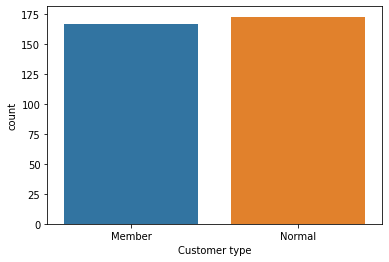

In [14]:
sns.countplot(data=df_A,x='Customer type')

In [15]:
df_A.groupby('Customer type').count()['Invoice ID']['Member']/len(df_A.index)*100

49.11764705882353

In [16]:
df_A.groupby('Customer type').count()['Invoice ID']['Normal']/len(df_A.index)*100

50.882352941176464

- This means that Member customers represents 49.1% from the total customers that come to this branch and normal customer represents 50.9%.And this indicates that this branch doesn't depend only on member customers or normal customers both of them are important to this branch.

In [17]:
df_A.groupby('Customer type').sum()['Total']

Customer type
Member    53637.4755
Normal    52562.8950
Name: Total, dtype: float64

<AxesSubplot:xlabel='Customer type', ylabel='Total'>

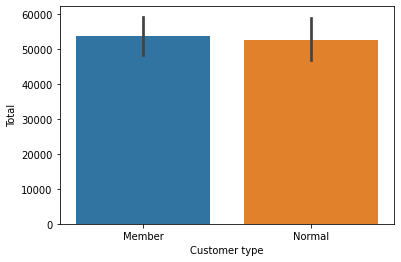

In [18]:
sns.barplot(data=df_A,x='Customer type',y='Total',estimator=np.sum)

In [19]:
df_A.groupby('Customer type').sum()['Total']['Member']/df_A['Total'].sum()*100

50.50592125759109

In [20]:
df_A.groupby('Customer type').sum()['Total']['Normal']/df_A['Total'].sum()*100

49.4940787424089

- As we show before that the number of normal customers greater than member customers but this branch earn more from member customers.As 50.5% from total money of this branch from Member customers while 49.5% from total money of this branch from normal customers.

In [21]:
df_A.groupby('Gender').count()['Invoice ID']

Gender
Female    161
Male      179
Name: Invoice ID, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

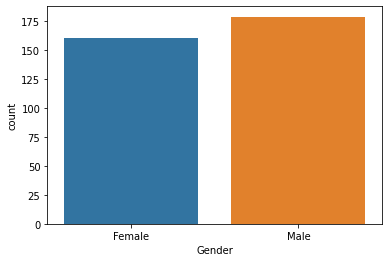

In [22]:
sns.countplot(data=df_A,x='Gender')

In [23]:
df_A.groupby('Gender').count()['Invoice ID']['Male']/len(df_A.index)*100

52.64705882352941

In [24]:
df_A.groupby('Gender').count()['Invoice ID']['Female']/len(df_A.index)*100

47.35294117647059

- This means that male customers represent 52.6% from the total customers that come to this branch and female customers represents nearly 47.4%.Also both of them are important to this branch.

In [25]:
df_A.groupby('Gender').sum()['Total']

Gender
Female    53269.1670
Male      52931.2035
Name: Total, dtype: float64

<AxesSubplot:xlabel='Gender', ylabel='Total'>

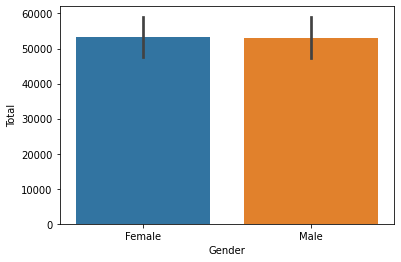

In [26]:
sns.barplot(data=df_A,x='Gender',y='Total',estimator=np.sum)

In [27]:
df_A.groupby('Gender').sum()['Total']['Male']/df_A['Total'].sum()*100

49.84088402968425

In [28]:
df_A.groupby('Gender').sum()['Total']['Female']/df_A['Total'].sum()*100

50.159115970315746

- As we show that male customers more than female customers but this branch earn more from female customers.As 50.1% from total money of this branch from female customers while 49.9% from total money of this branch from male customers.

In [29]:
products_line=['Electronic accessories','Fashion accessories','Food and beverages','Health and beauty','Home and lifestyle','Sports and travel']
for product in products_line:
    sum_of_quantity=df_A[df_A['Product line']==product]['Quantity'].sum()
    print(f"the number of quantities sold for {product} product is {sum_of_quantity}")



the number of quantities sold for Electronic accessories product is 322
the number of quantities sold for Fashion accessories product is 263
the number of quantities sold for Food and beverages product is 313
the number of quantities sold for Health and beauty product is 257
the number of quantities sold for Home and lifestyle product is 371
the number of quantities sold for Sports and travel product is 333


- This shows that the Home and lifestyle product is the most product that have been sold.

In [30]:
df_A.groupby('Product line').sum()['Total']

Product line
Electronic accessories    18317.1135
Fashion accessories       16332.5085
Food and beverages        17163.1005
Health and beauty         12597.7530
Home and lifestyle        22417.1955
Sports and travel         19372.6995
Name: Total, dtype: float64

<AxesSubplot:xlabel='Total', ylabel='Product line'>

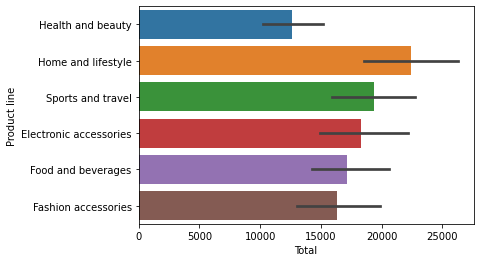

In [31]:
sns.barplot(data=df_A,y='Product line',x='Total',estimator=np.sum)

In [32]:
for product in products_line:
    perc=df_A.groupby('Product line').sum()['Total'][product]/df_A['Total'].sum()*100
    print(f"{product} product represents {perc}% from total money of this branch.")

Electronic accessories product represents 17.247692652823655% from total money of this branch.
Fashion accessories product represents 15.378956234432344% from total money of this branch.
Food and beverages product represents 16.161055200838494% from total money of this branch.
Health and beauty product represents 11.862249576615177% from total money of this branch.
Home and lifestyle product represents 21.108396698107565% from total money of this branch.
Sports and travel product represents 18.24164963718276% from total money of this branch.


- This means that Electronic accessories represent 17.24% from total money of this branch and Fashion accessories reprensents 15.37% from total money of this branch and Food and beverages represents 16.16% from total money of this branch and Health and beauty represents 11.86 from total money of this branch and Home and lifestyle represents 21.10% from total money of this branch and Sports and travel represents 18.24 from total money of this branch.Therefore this branch earn more from Home and lifestyle product.

In [33]:
df_A['Total'].sum()/df['Total'].sum()*100

32.882756763297635

- This means that this branch represents 32.88% from the total money of the supermarket.This is high percentage and means that how important is this branch

In [34]:
df_A.groupby('Product line').mean()['Rating']

Product line
Electronic accessories    6.911667
Fashion accessories       6.878431
Food and beverages        7.253448
Health and beauty         6.900000
Home and lifestyle        6.930769
Sports and travel         7.257627
Name: Rating, dtype: float64

<AxesSubplot:xlabel='Rating', ylabel='Product line'>

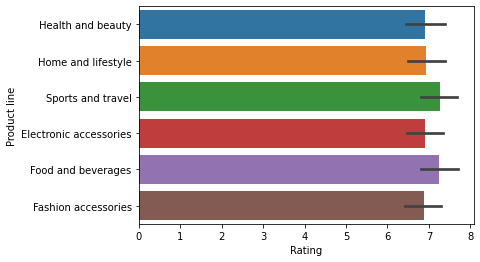

In [35]:
sns.barplot(data=df_A,y='Product line',x='Rating')

In [36]:
df_A['Rating'].mean()

7.027058823529413

- Average rating of this branch is 7 out of 10 i think it is good rate but need to be improved.

In [37]:
df_A.groupby('Payment').count()['Invoice ID']

Payment
Cash           110
Credit card    104
Ewallet        126
Name: Invoice ID, dtype: int64

<AxesSubplot:xlabel='Payment', ylabel='count'>

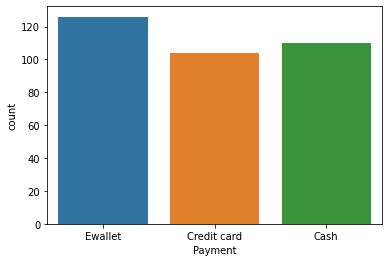

In [38]:
sns.countplot(data=df_A,x='Payment')

- This means that the most used payment method in this branch is ewallet.

In [39]:
df_A.groupby('day_name').count()['Invoice ID']

day_name
Friday       50
Monday       48
Saturday     50
Sunday       52
Thursday     46
Tuesday      51
Wednesday    43
Name: Invoice ID, dtype: int64

<AxesSubplot:xlabel='count', ylabel='day_name'>

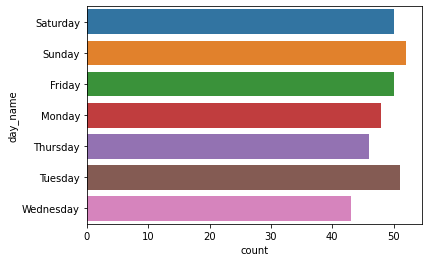

In [40]:
sns.countplot(data=df_A,y='day_name')

In [41]:
df_A.groupby('day_name').sum()['Total'].sort_values(ascending=False)

day_name
Sunday       17006.8185
Saturday     16765.4130
Thursday     15422.2740
Tuesday      14955.2130
Friday       14543.8650
Monday       14239.0605
Wednesday    13267.7265
Name: Total, dtype: float64

<AxesSubplot:xlabel='Total', ylabel='day_name'>

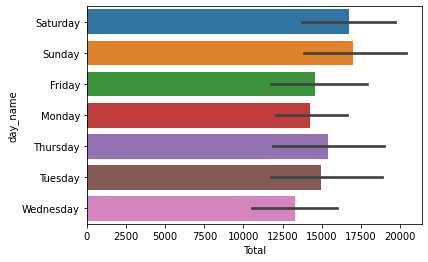

In [42]:
sns.barplot(data=df_A,y='day_name',x='Total',estimator=np.sum)

- This means that the most day that customer visit to this branch is sunday and also this is the day that this branch earn more money on it

In [43]:
df_A.groupby('day_period').count()['Invoice ID']

day_period
Afternoon    185
Evenning      82
Morning       73
Name: Invoice ID, dtype: int64

<AxesSubplot:xlabel='count', ylabel='day_period'>

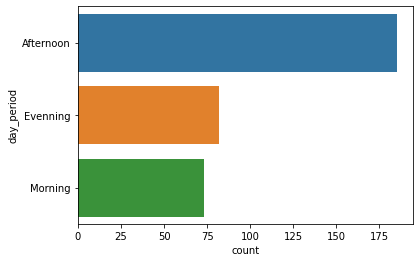

In [44]:
sns.countplot(data=df_A,y='day_period')

In [45]:
df_A.groupby('day_period').sum()['Total'].sort_values(ascending=False)

day_period
Afternoon    59968.4085
Evenning     23673.6570
Morning      22558.3050
Name: Total, dtype: float64

<AxesSubplot:xlabel='Total', ylabel='day_period'>

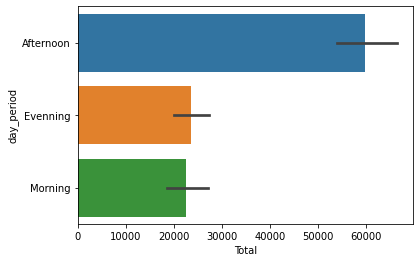

In [46]:
sns.barplot(data=df_A,y='day_period',x='Total',estimator=np.sum)

In [47]:
df_A.groupby('day_period').sum()['Total']['Afternoon']/df_A['Total'].sum()*100

56.46723096884111

- This shows that most of the customers visits this branch at afternoon and also this period earning about 56.46% from the total money that this branch earned.This shows how important is this period.

# Analysis on Branch B:

- this branch places in Mandalay City

In [48]:
df_B=df[df['Branch']=='B']
df_B

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,Rating,DateTime,day_name,Hour,day_period
9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.84,3,8.226,172.746,Credit card,5.9,2019-02-20 13:27:00,Wednesday,13,Afternoon
10,351-62-0822,B,Mandalay,Member,Female,Fashion accessories,14.48,4,2.896,60.816,Ewallet,4.5,2019-02-06 18:07:00,Wednesday,18,Evenning
11,529-56-3974,B,Mandalay,Member,Male,Electronic accessories,25.51,4,5.102,107.142,Cash,6.8,2019-03-09 17:03:00,Saturday,17,Afternoon
15,299-46-1805,B,Mandalay,Member,Female,Sports and travel,93.72,6,28.116,590.436,Cash,4.5,2019-01-15 16:19:00,Tuesday,16,Afternoon
19,319-50-3348,B,Mandalay,Normal,Female,Home and lifestyle,40.30,2,4.030,84.630,Ewallet,4.4,2019-03-11 15:30:00,Monday,15,Afternoon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987,552-44-5977,B,Mandalay,Member,Male,Health and beauty,62.00,8,24.800,520.800,Credit card,6.2,2019-01-03 19:08:00,Thursday,19,Evenning
989,430-53-4718,B,Mandalay,Member,Male,Health and beauty,75.37,8,30.148,633.108,Credit card,8.4,2019-01-28 15:46:00,Monday,15,Afternoon
991,602-16-6955,B,Mandalay,Normal,Female,Sports and travel,76.60,10,38.300,804.300,Ewallet,6.0,2019-01-24 18:10:00,Thursday,18,Evenning
993,690-01-6631,B,Mandalay,Normal,Male,Fashion accessories,17.49,10,8.745,183.645,Ewallet,6.6,2019-02-22 18:35:00,Friday,18,Evenning


In [49]:
perc=len(df_B.index)/len(df.index)*100
perc

33.2

- This means that branch B that locates in Mandalay city contains 33.2% from the total Customers.

In [50]:
df_B.groupby('Customer type').count()['Invoice ID']

Customer type
Member    165
Normal    167
Name: Invoice ID, dtype: int64

<AxesSubplot:xlabel='Customer type', ylabel='count'>

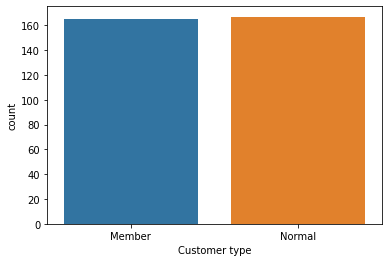

In [51]:
sns.countplot(data=df_B,x='Customer type')

In [52]:
df_B.groupby('Customer type').count()['Invoice ID']['Member']/len(df_B.index)*100

49.6987951807229

In [53]:
df_B.groupby('Customer type').count()['Invoice ID']['Normal']/len(df_B.index)*100

50.30120481927711

- This means that Member customers represents 49.7% from the total customers that come to this branch and normal customer represents 50.3%.And this indicates that this branch doesn't depend only on member customers or normal customers both of them are important to this branch.

In [54]:
df_B.groupby('Customer type').sum()['Total']

Customer type
Member    53704.686
Normal    52492.986
Name: Total, dtype: float64

<AxesSubplot:xlabel='Customer type', ylabel='Total'>

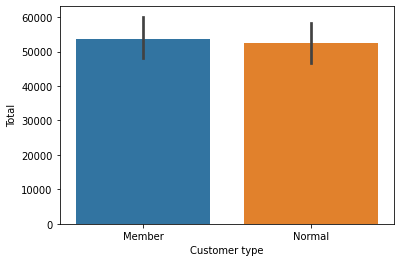

In [55]:
sns.barplot(data=df_B,x='Customer type',y='Total',estimator=np.sum)

In [56]:
df_B.groupby('Customer type').sum()['Total']['Member']/df_B['Total'].sum()*100

50.57049273170509

In [57]:
df_B.groupby('Customer type').sum()['Total']['Normal']/df_B['Total'].sum()*100

49.42950726829492

- As we show before that the number of normal customers greater than member customers but this branch earn more from member customers.As 50.6% from total money of this branch from Member customers while 49.4% from total money of this branch from normal customers.

In [58]:
df_B.groupby('Gender').count()['Invoice ID']

Gender
Female    162
Male      170
Name: Invoice ID, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

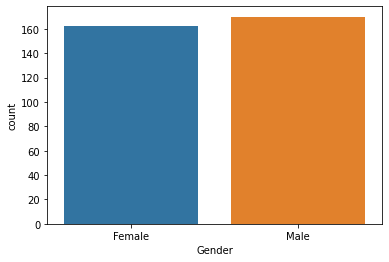

In [59]:
sns.countplot(data=df_B,x='Gender')

In [60]:
df_B.groupby('Gender').count()['Invoice ID']['Male']/len(df_B.index)*100

51.204819277108435

In [61]:
df_B.groupby('Gender').count()['Invoice ID']['Female']/len(df_B.index)*100

48.795180722891565

- This means that male customers represent 51.2% from the total customers that come to this branch and female customers represents nearly 48.8%.Also both of them are important to this branch.

In [62]:
df_B.groupby('Gender').sum()['Total']

Gender
Female    52928.295
Male      53269.377
Name: Total, dtype: float64

<AxesSubplot:xlabel='Gender', ylabel='Total'>

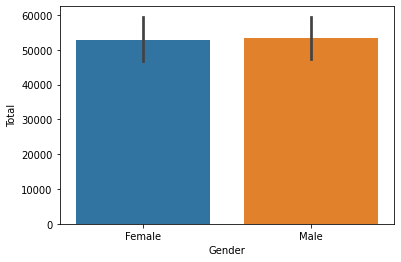

In [63]:
sns.barplot(data=df_B,x='Gender',y='Total',estimator=np.sum)

In [64]:
df_B.groupby('Gender').sum()['Total']['Male']/df_B['Total'].sum()*100

50.16058826600267

In [65]:
df_B.groupby('Gender').sum()['Total']['Female']/df_B['Total'].sum()*100

49.83941173399734

- This branch earn more from male customers.As 50.1% from total money of this branch from male customers while 49.9% from total money of this branch from female customers.

In [66]:
products_line=['Electronic accessories','Fashion accessories','Food and beverages','Health and beauty','Home and lifestyle','Sports and travel']
for product in products_line:
    sum_of_quantity=df_B[df_B['Product line']==product]['Quantity'].sum()
    print(f"the number of quantities sold for {product} product is {sum_of_quantity}")



the number of quantities sold for Electronic accessories product is 316
the number of quantities sold for Fashion accessories product is 297
the number of quantities sold for Food and beverages product is 270
the number of quantities sold for Health and beauty product is 320
the number of quantities sold for Home and lifestyle product is 295
the number of quantities sold for Sports and travel product is 322


- This shows that the Sports and travel product is the most product that have been sold.

In [67]:
df_B.groupby('Product line').sum()['Total']

Product line
Electronic accessories    17051.4435
Fashion accessories       16413.3165
Food and beverages        15214.8885
Health and beauty         19980.6600
Home and lifestyle        17549.1645
Sports and travel         19988.1990
Name: Total, dtype: float64

<AxesSubplot:xlabel='Total', ylabel='Product line'>

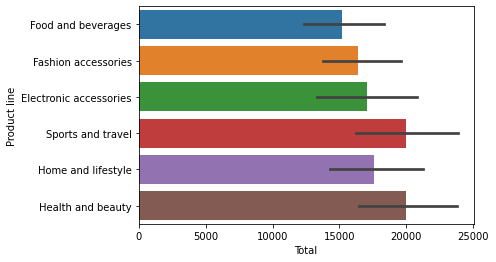

In [68]:
sns.barplot(data=df_B,y='Product line',x='Total',estimator=np.sum)

In [69]:
for product in products_line:
    perc=df_B.groupby('Product line').sum()['Total'][product]/df_B['Total'].sum()*100
    print(f"{product} product represents {perc}% from total money of this branch.")

Electronic accessories product represents 16.056325133002918% from total money of this branch.
Fashion accessories product represents 15.455439079681524% from total money of this branch.
Food and beverages product represents 14.326951065367988% from total money of this branch.
Health and beauty product represents 18.81459322385146% from total money of this branch.
Home and lifestyle product represents 16.5249992485711% from total money of this branch.
Sports and travel product represents 18.82169224952502% from total money of this branch.


- This means that Electronic accessories represents 16.05% from total money of this branch and Fashion accessories reprensents 15.45% from total money of this branch and Food and beverages represents 14.32% from total money of this branch and Health and beauty represents 18.81% from total money of this branch and Home and lifestyle represents 16.52% from total money of this branch and Sports and travel represents 18.82% from total money of this branch.Therefore this branch earn more from Sports and travel product.

In [70]:
df_B['Total'].sum()/df['Total'].sum()*100

32.88192122836769

- This means that this branch represents 32.88% from the total money of the supermarket.This is high percentage and means that how important is this branch

In [71]:
df_B.groupby('Product line').mean()['Rating']

Product line
Electronic accessories    7.116364
Fashion accessories       6.722581
Food and beverages        6.994000
Health and beauty         7.100000
Home and lifestyle        6.516000
Sports and travel         6.509677
Name: Rating, dtype: float64

<AxesSubplot:xlabel='Rating', ylabel='Product line'>

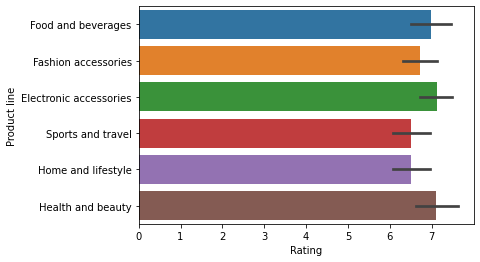

In [72]:
sns.barplot(data=df_B,y='Product line',x='Rating')

In [73]:
df_B['Rating'].mean()

6.8180722891566266

- Average rating of this branch is 6.8 out of 10 it needs to be improved.

In [74]:
df_B.groupby('Payment').count()['Invoice ID']

Payment
Cash           110
Credit card    109
Ewallet        113
Name: Invoice ID, dtype: int64

<AxesSubplot:xlabel='Payment', ylabel='count'>

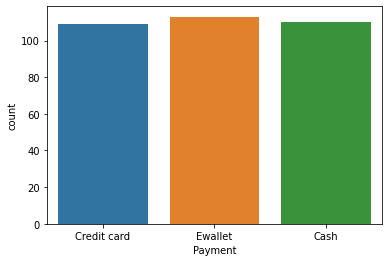

In [75]:
sns.countplot(data=df_B,x='Payment')

- This means that the most used payment method in this branch is ewallet.

In [76]:
df_B.groupby('day_name').count()['Invoice ID']

day_name
Friday       51
Monday       39
Saturday     60
Sunday       35
Thursday     44
Tuesday      53
Wednesday    50
Name: Invoice ID, dtype: int64

<AxesSubplot:xlabel='count', ylabel='day_name'>

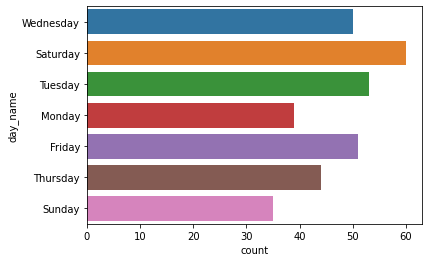

In [77]:
sns.countplot(data=df_B,y='day_name')

In [78]:
df_B.groupby('day_name').sum()['Total'].sort_values(ascending=False)

day_name
Saturday     21284.4240
Tuesday      18859.2390
Thursday     15778.6230
Friday       14417.7600
Monday       12734.7045
Wednesday    12707.5935
Sunday       10415.3280
Name: Total, dtype: float64

<AxesSubplot:xlabel='Total', ylabel='day_name'>

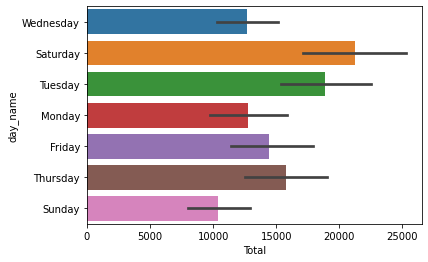

In [79]:
sns.barplot(data=df_B,y='day_name',x='Total',estimator=np.sum)

- This means that the most day that customers visit to this branch is saturday and also this is the day that this branch earn more money on it

In [80]:
df_B.groupby('day_period').count()['Invoice ID']

day_period
Afternoon    162
Evenning     111
Morning       59
Name: Invoice ID, dtype: int64

<AxesSubplot:xlabel='count', ylabel='day_period'>

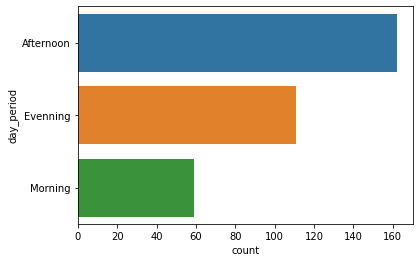

In [81]:
sns.countplot(data=df_B,y='day_period')

In [82]:
df_B.groupby('day_period').sum()['Total'].sort_values(ascending=False)

day_period
Afternoon    53648.1645
Evenning     33201.8505
Morning      19347.6570
Name: Total, dtype: float64

<AxesSubplot:xlabel='Total', ylabel='day_period'>

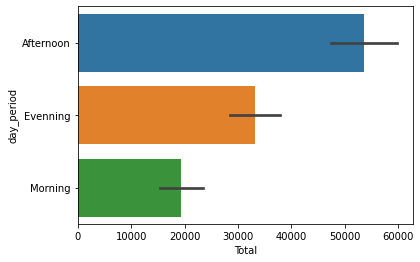

In [83]:
sns.barplot(data=df_B,y='day_period',x='Total',estimator=np.sum)

In [84]:
df_B.groupby('day_period').sum()['Total']['Afternoon']/df_B['Total'].sum()*100

50.517269813598176

- This shows that most of the customers visits this branch at afternoon and also this period earning about 50.51% from the total money that this branch earned.This shows how important is this period.

# Analysis on Branch C:

- This branch locates in Naypyitaw city.

In [85]:
df_C=df[df['Branch']=='C']
df_C

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,Rating,DateTime,day_name,Hour,day_period
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,9.6,2019-03-08 10:29:00,Friday,10,Morning
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,Ewallet,4.1,2019-03-25 18:30:00,Monday,18,Evenning
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,Ewallet,8.0,2019-02-24 11:38:00,Sunday,11,Morning
20,300-71-4605,C,Naypyitaw,Member,Male,Electronic accessories,86.04,5,21.5100,451.7100,Ewallet,4.8,2019-02-25 11:24:00,Monday,11,Morning
34,183-56-6882,C,Naypyitaw,Member,Female,Food and beverages,99.42,4,19.8840,417.5640,Ewallet,7.5,2019-02-06 10:42:00,Wednesday,10,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
983,148-41-7930,C,Naypyitaw,Normal,Male,Health and beauty,99.96,7,34.9860,734.7060,Cash,6.1,2019-01-23 10:33:00,Wednesday,10,Morning
984,189-40-5216,C,Naypyitaw,Normal,Male,Electronic accessories,96.37,7,33.7295,708.3195,Cash,6.0,2019-01-09 11:40:00,Wednesday,11,Morning
988,267-62-7380,C,Naypyitaw,Member,Male,Electronic accessories,82.34,10,41.1700,864.5700,Ewallet,4.3,2019-03-29 19:12:00,Friday,19,Evenning
994,652-49-6720,C,Naypyitaw,Member,Female,Electronic accessories,60.95,1,3.0475,63.9975,Ewallet,5.9,2019-02-18 11:40:00,Monday,11,Morning


In [86]:
perc=len(df_C.index)/len(df.index)*100
perc

32.800000000000004

- This means that branch C that locates in Naypyitaw city contains 32.8% from the total Customers.

In [87]:
df_C.groupby('Customer type').count()['Invoice ID']

Customer type
Member    169
Normal    159
Name: Invoice ID, dtype: int64

<AxesSubplot:xlabel='Customer type', ylabel='count'>

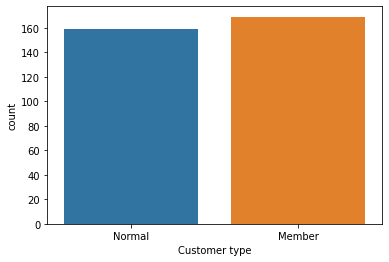

In [88]:
sns.countplot(data=df_C,x='Customer type')

In [89]:
df_C.groupby('Customer type').count()['Invoice ID']['Member']/len(df_C.index)*100

51.52439024390244

In [90]:
df_C.groupby('Customer type').count()['Invoice ID']['Normal']/len(df_C.index)*100

48.47560975609756

- This means that Member customers represents 51.5% from the total customers that come to this branch and normal customer represents 48.5%.And this indicates that this branch doesn't depend only on member customers or normal customers both of them are important to this branch.

In [91]:
df_C.groupby('Customer type').sum()['Total']

Customer type
Member    56881.2825
Normal    53687.4240
Name: Total, dtype: float64

<AxesSubplot:xlabel='Customer type', ylabel='Total'>

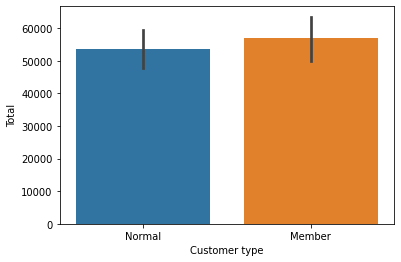

In [92]:
sns.barplot(data=df_C,x='Customer type',y='Total',estimator=np.sum)

In [93]:
df_C.groupby('Customer type').sum()['Total']['Member']/df_C['Total'].sum()*100

51.44428681545623

In [94]:
df_C.groupby('Customer type').sum()['Total']['Normal']/df_C['Total'].sum()*100

48.55571318454376

- This branch earn more from member customers.As 51.44% from total money of this branch from Member customers while 48.55% from total money of this branch from normal customers.

In [95]:
df_C.groupby('Gender').count()['Invoice ID']

Gender
Female    178
Male      150
Name: Invoice ID, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

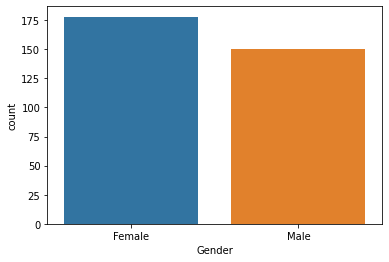

In [96]:
sns.countplot(data=df_C,x='Gender')

In [97]:
df_C.groupby('Gender').count()['Invoice ID']['Male']/len(df_C.index)*100

45.73170731707317

In [98]:
df_C.groupby('Gender').count()['Invoice ID']['Female']/len(df_C.index)*100

54.268292682926834

- This means that Female customers represent 54.26% from the total customers that come to this branch and male customers represents 45.73%.This shows that this branch depend on female more than male but not with high percent.

In [99]:
df_C.groupby('Gender').sum()['Total']

Gender
Female    61685.4630
Male      48883.2435
Name: Total, dtype: float64

<AxesSubplot:xlabel='Gender', ylabel='Total'>

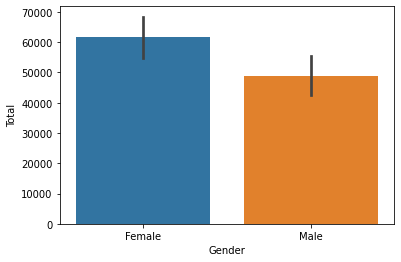

In [100]:
sns.barplot(data=df_C,x='Gender',y='Total',estimator=np.sum)

In [101]:
df_C.groupby('Gender').sum()['Total']['Male']/df_C['Total'].sum()*100

44.21074013378279

In [102]:
df_C.groupby('Gender').sum()['Total']['Female']/df_C['Total'].sum()*100

55.78925986621721

- This branch earn more from female customers.As 55.8% from total money of this branch from female customers while 44.2% from total money of this branch from male customers.

In [103]:
products_line=['Electronic accessories','Fashion accessories','Food and beverages','Health and beauty','Home and lifestyle','Sports and travel']
for product in products_line:
    sum_of_quantity=df_C[df_C['Product line']==product]['Quantity'].sum()
    print(f"the number of quantities sold for {product} product is {sum_of_quantity}")



the number of quantities sold for Electronic accessories product is 333
the number of quantities sold for Fashion accessories product is 342
the number of quantities sold for Food and beverages product is 369
the number of quantities sold for Health and beauty product is 277
the number of quantities sold for Home and lifestyle product is 245
the number of quantities sold for Sports and travel product is 265


- This shows that the Food and beverages product is the most product that have been sold.

In [104]:
df_C.groupby('Product line').sum()['Total']

Product line
Electronic accessories    18968.9745
Fashion accessories       21560.0700
Food and beverages        23766.8550
Health and beauty         16615.3260
Home and lifestyle        13895.5530
Sports and travel         15761.9280
Name: Total, dtype: float64

<AxesSubplot:xlabel='Total', ylabel='Product line'>

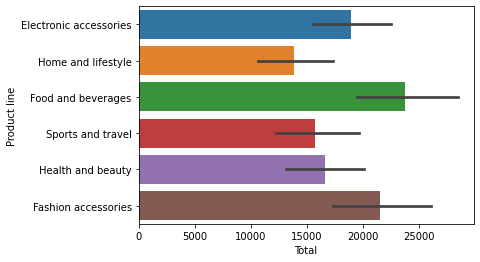

In [105]:
sns.barplot(data=df_C,y='Product line',x='Total',estimator=np.sum)

In [106]:
for product in products_line:
    perc=df_C.groupby('Product line').sum()['Total'][product]/df_C['Total'].sum()*100
    print(f"{product} product represents {perc}% from total money of this branch.")

Electronic accessories product represents 17.155825640413006% from total money of this branch.
Fashion accessories product represents 19.4992513546317% from total money of this branch.
Food and beverages product represents 21.49510087648534% from total money of this branch.
Health and beauty product represents 15.027150561809277% from total money of this branch.
Home and lifestyle product represents 12.567346982575037% from total money of this branch.
Sports and travel product represents 14.255324584085644% from total money of this branch.


- This means that Electronic accessories represent 17.15% from total money of this branch and Fashion accessories reprensents 19.49% from total money of this branch and Food and beverages represents 21.49% from total money of this branch and Health and beauty represents 15.02% from total money of this branch and Home and lifestyle represents 12.56% from total money of this branch and Sports and travel represents 14.25 from total money of this branch.Therefore this branch earn more from Food and beverages product.

In [107]:
df_C['Total'].sum()/df['Total'].sum()*100

34.23532200833467

- This means that this branch represents 34.23% from the total money of the supermarket.This is the highest percentage and means that how important is this branch.

In [108]:
df_C.groupby('Product line').mean()['Rating']

Product line
Electronic accessories    6.747273
Fashion accessories       7.440000
Food and beverages        7.080303
Health and beauty         6.998077
Home and lifestyle        7.060000
Sports and travel         7.028889
Name: Rating, dtype: float64

<AxesSubplot:xlabel='Rating', ylabel='Product line'>

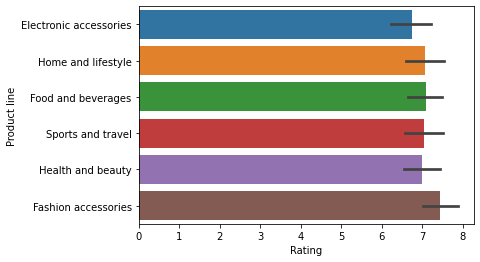

In [109]:
sns.barplot(data=df_C,y='Product line',x='Rating')

In [110]:
df_C['Rating'].mean()

7.072865853658538

- Average rating of this branch is 7 out of 10 i think it is good rate but need to be improved.

In [111]:
df_C.groupby('Payment').count()['Invoice ID']

Payment
Cash           124
Credit card     98
Ewallet        106
Name: Invoice ID, dtype: int64

<AxesSubplot:xlabel='Payment', ylabel='count'>

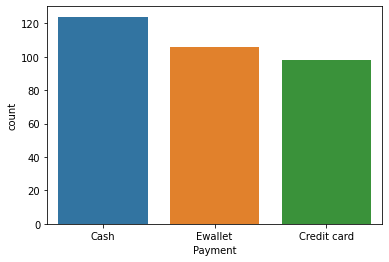

In [112]:
sns.countplot(data=df_C,x='Payment')

- This means that the most used payment method in this branch is cash.

In [113]:
df_C.groupby('day_name').count()['Invoice ID']

day_name
Friday       38
Monday       38
Saturday     54
Sunday       46
Thursday     48
Tuesday      54
Wednesday    50
Name: Invoice ID, dtype: int64

<AxesSubplot:xlabel='count', ylabel='day_name'>

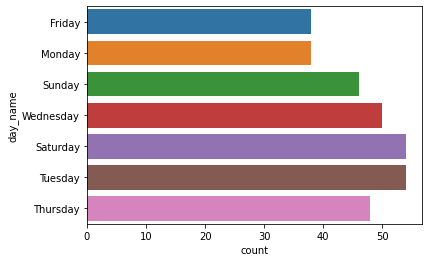

In [114]:
sns.countplot(data=df_C,y='day_name')

In [115]:
df_C.groupby('day_name').sum()['Total'].sort_values(ascending=False)

day_name
Saturday     18070.9725
Wednesday    17755.8150
Tuesday      17667.7935
Sunday       17035.7460
Friday       14964.7155
Thursday     14148.3510
Monday       10925.3130
Name: Total, dtype: float64

<AxesSubplot:xlabel='Total', ylabel='day_name'>

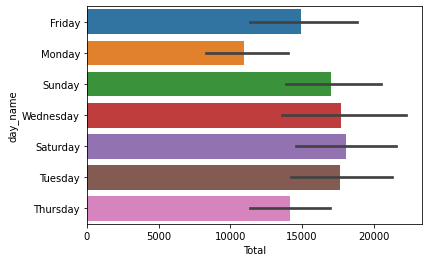

In [116]:
sns.barplot(data=df_C,y='day_name',x='Total',estimator=np.sum)

- This means that the most day that customer visit to this branch is saturday and tuesdat and also saturday is the day that this branch earn more money on it.

In [117]:
df_C.groupby('day_period').count()['Invoice ID']

day_period
Afternoon    181
Evenning      88
Morning       59
Name: Invoice ID, dtype: int64

<AxesSubplot:xlabel='count', ylabel='day_period'>

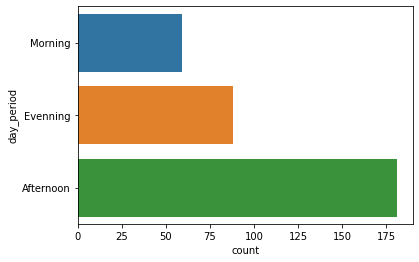

In [118]:
sns.countplot(data=df_C,y='day_period')

In [119]:
df_C.groupby('day_period').sum()['Total'].sort_values(ascending=False)

day_period
Afternoon    58851.9855
Evenning     31823.8725
Morning      19892.8485
Name: Total, dtype: float64

<AxesSubplot:xlabel='Total', ylabel='day_period'>

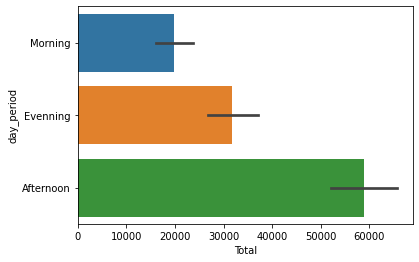

In [120]:
sns.barplot(data=df_C,y='day_period',x='Total',estimator=np.sum)

In [121]:
df_C.groupby('day_period').sum()['Total']['Afternoon']/df_C['Total'].sum()*100

53.22662022821078

- This shows that most of the customer visits this branch at afternoon and also this period earning about 53.22% from the total money that this branch earned.This shows how important is this period.

# Analaysis on three branches together :

In [122]:
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,Rating,DateTime,day_name,Hour,day_period
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,9.1,2019-01-05 13:08:00,Saturday,13,Afternoon
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,9.6,2019-03-08 10:29:00,Friday,10,Morning
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,7.4,2019-03-03 13:23:00,Sunday,13,Afternoon
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,8.4,2019-01-27 20:33:00,Sunday,20,Evenning
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,5.3,2019-02-08 10:37:00,Friday,10,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,Ewallet,6.2,2019-01-29 13:46:00,Tuesday,13,Afternoon
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,Ewallet,4.4,2019-03-02 17:16:00,Saturday,17,Afternoon
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,Cash,7.7,2019-02-09 13:22:00,Saturday,13,Afternoon
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,Cash,4.1,2019-02-22 15:33:00,Friday,15,Afternoon


In [123]:
df.groupby("Branch").count()['Invoice ID']

Branch
A    340
B    332
C    328
Name: Invoice ID, dtype: int64

<AxesSubplot:xlabel='Branch', ylabel='count'>

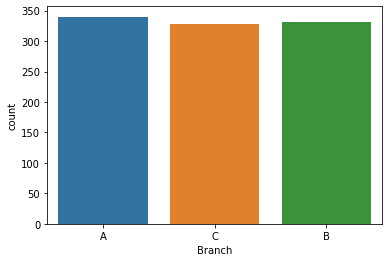

In [124]:
sns.countplot(data=df,x='Branch')

- This means that branch A has more customers.

In [125]:
df.groupby('Branch').sum()['Total']

Branch
A    106200.3705
B    106197.6720
C    110568.7065
Name: Total, dtype: float64

<AxesSubplot:xlabel='Branch', ylabel='Total'>

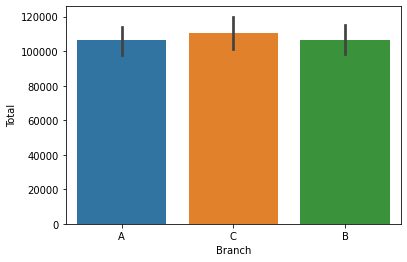

In [126]:
sns.barplot(data=df,x='Branch',y='Total',estimator=np.sum)

- while c is the less branch that customers visit but it is the more branch that gain money.

In [127]:
df.groupby('Customer type').count()['Invoice ID']

Customer type
Member    501
Normal    499
Name: Invoice ID, dtype: int64

<AxesSubplot:xlabel='Customer type', ylabel='count'>

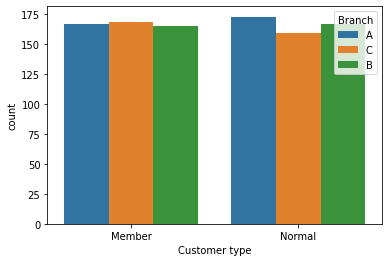

In [128]:
sns.countplot(data=df,x='Customer type',hue='Branch')

In [129]:
df.groupby('Customer type').sum()['Total']

Customer type
Member    164223.444
Normal    158743.305
Name: Total, dtype: float64

<AxesSubplot:xlabel='Customer type', ylabel='Total'>

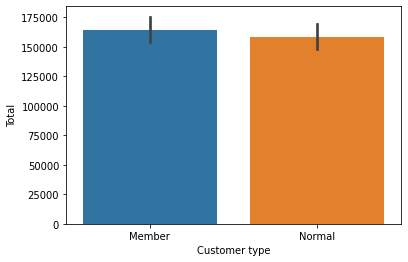

In [130]:
sns.barplot(data=df,x='Customer type',y='Total',estimator=np.sum)

- This means that member customer greater than normal customers but both of them are important to the supermarket and supermarket earn more from Members customers.

In [131]:
df.groupby('Gender').count()['Invoice ID']

Gender
Female    501
Male      499
Name: Invoice ID, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

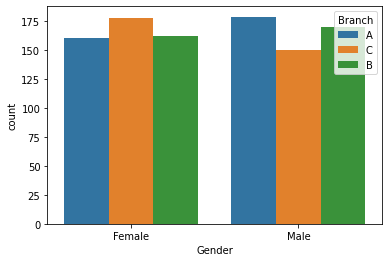

In [132]:
sns.countplot(data=df,x='Gender',hue='Branch')

In [133]:
df.groupby('Gender').sum()['Total']

Gender
Female    167882.925
Male      155083.824
Name: Total, dtype: float64

<AxesSubplot:xlabel='Gender', ylabel='Total'>

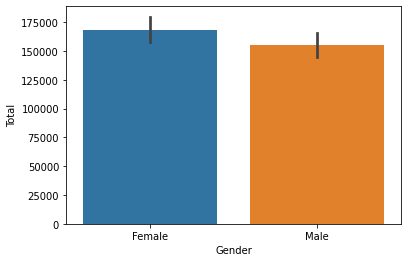

In [134]:
sns.barplot(data=df,x='Gender',y='Total',estimator=np.sum)

- This means that female visits and spend more than male but without high perc between them.

In [135]:
df['Rating'].mean()

6.972700000000003

- This means that average rate of the supermarket is 6.972

In [136]:
df['Payment'].value_counts()

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64

<AxesSubplot:xlabel='Payment', ylabel='count'>

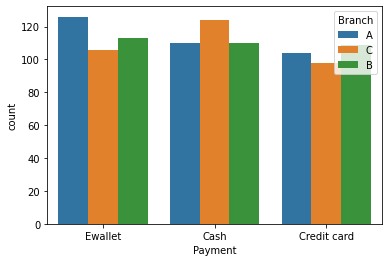

In [137]:
sns.countplot(data=df,x='Payment',hue='Branch')

- This means that Ewallet is the most payment method in supermarket then cash the credit card

In [138]:
products_line=['Electronic accessories','Fashion accessories','Food and beverages','Health and beauty','Home and lifestyle','Sports and travel']
for product in products_line:
    sum_of_quantity=df[df['Product line']==product]['Quantity'].sum()
    print(f"the number of quantities sold for {product} product is {sum_of_quantity}")

the number of quantities sold for Electronic accessories product is 971
the number of quantities sold for Fashion accessories product is 902
the number of quantities sold for Food and beverages product is 952
the number of quantities sold for Health and beauty product is 854
the number of quantities sold for Home and lifestyle product is 911
the number of quantities sold for Sports and travel product is 920


- This means that Electronic accessories product is the most product that have been sold in all branches.

In [139]:
df.groupby('Product line').sum()['Total']

Product line
Electronic accessories    54337.5315
Fashion accessories       54305.8950
Food and beverages        56144.8440
Health and beauty         49193.7390
Home and lifestyle        53861.9130
Sports and travel         55122.8265
Name: Total, dtype: float64

<AxesSubplot:xlabel='Total', ylabel='Product line'>

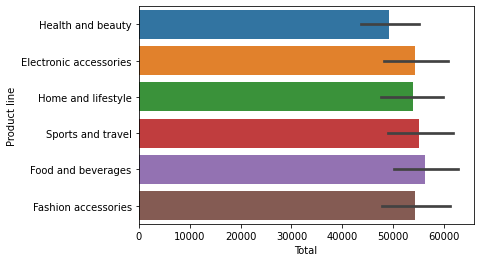

In [140]:
sns.barplot(data=df,y='Product line',x='Total',estimator=np.sum)

- This means that food and beverages is the most product that supermarket earn from him.

In [141]:
df['day_name'].value_counts()

Saturday     164
Tuesday      158
Wednesday    143
Friday       139
Thursday     138
Sunday       133
Monday       125
Name: day_name, dtype: int64

<AxesSubplot:xlabel='count', ylabel='day_name'>

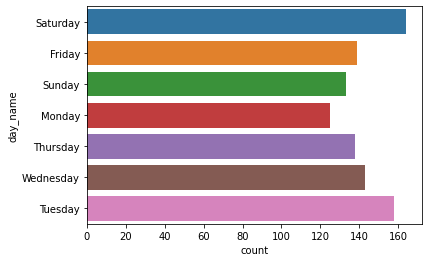

In [142]:
sns.countplot(data=df,y='day_name')

In [143]:
df.groupby('day_name').sum()['Total']

day_name
Friday       43926.3405
Monday       37899.0780
Saturday     56120.8095
Sunday       44457.8925
Thursday     45349.2480
Tuesday      51482.2455
Wednesday    43731.1350
Name: Total, dtype: float64

<AxesSubplot:xlabel='Total', ylabel='day_name'>

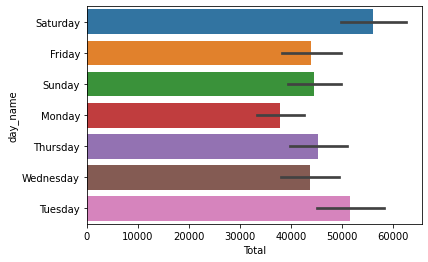

In [144]:
sns.barplot(data=df,y='day_name',x='Total',estimator=np.sum)

- This means that saturday is the most day that customers visit supermarket and spend more on it.

In [145]:
df['day_period'].value_counts()

Afternoon    528
Evenning     281
Morning      191
Name: day_period, dtype: int64

<AxesSubplot:xlabel='count', ylabel='day_period'>

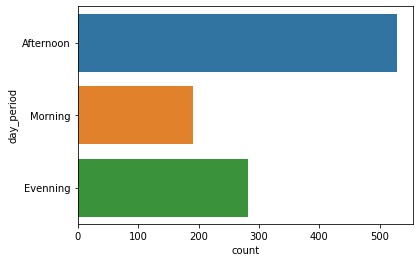

In [146]:
sns.countplot(data=df,y='day_period')

In [147]:
df.groupby('day_period').sum()['Total']

day_period
Afternoon    172468.5585
Evenning      88699.3800
Morning       61798.8105
Name: Total, dtype: float64

<AxesSubplot:xlabel='Total', ylabel='day_period'>

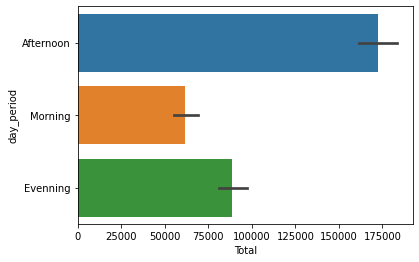

In [148]:
sns.barplot(data=df,y='day_period',x='Total',estimator=np.sum)

- This means that Afternoon is the most period that customers visits supermarket and spend more on it.